In [37]:
import numpy as np
import tensorflow as tf 
import csv
import pandas as pd
import sklearn
import itertools
import matplotlib.pyplot as plt
from sklearn import decomposition, tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
data1 =  pd.read_csv('data_t1.csv')
data1 = shuffle(data1)
data1.shape

(2874, 1202)

In [4]:
train, test =train_test_split(data1, test_size=0.2)

train = np.asarray(train)
test = np.asarray(test)

xtr = train[:, 0:1200]
ytr = train[:, 1201]

xts = test[:, 0:1200]
yts = test[:, 1201]

full_feat = xtr.shape[1]
red_scale = 10
red_feat = full_feat/red_scale

In [5]:
xtrsp = np.hsplit(xtr,red_scale)
xtssp = np.hsplit(xts,red_scale)

In [6]:
xtrs = np.asarray([np.mean(xtrsp[i],axis =1) for i in range (red_scale)]).T
xtss = np.asarray([np.mean(xtssp[i],axis =1) for i in range (red_scale)]).T

In [7]:
tr_mean = np.mean(xtrs, axis=0)
tr_std = np.std(xtrs, axis = 0,dtype=np.float64)
xtr_p = (xtrs - tr_mean[None,:])/tr_std[None,:]

ts_mean = np.mean(xtss, axis=0)
ts_std = np.std(xtss, axis = 0,dtype=np.float64)
xts_p = (xtss - ts_mean[None,:])/ts_std[None,:]

n_classes = 4
n_labels= np.unique(ytr)

label_binarizer = sklearn.preprocessing.LabelEncoder()
label_binarizer.fit(n_labels)

yohtr = label_binarizer.transform(ytr)
yohts = label_binarizer.transform(yts)

In [17]:
pca = decomposition.PCA(n_components ='mle', svd_solver = 'full')
pca.fit(xtr_p)
xtr_pca = pca.transform(xtr_p)
xts_pca = pca.transform(xts_p)

In [18]:
rf_class = RandomForestClassifier(n_estimators=1000)
pred_rf = rf_class.fit(xtr_pca, yohtr).predict(xts_pca)
pred_y1 = label_binarizer.inverse_transform(pred_rf)
accuracy_score(yohts, pred_rf)

0.45217391304347826

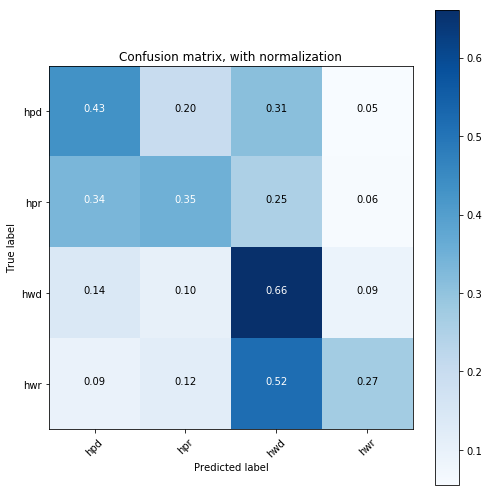

In [19]:
cnf_matrix1 = confusion_matrix(yts,pred_y1)
np.set_printoptions(precision=2)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix1,normalize=True, classes=n_labels,title='Confusion matrix, with normalization')
plt.show()

In [35]:
TP = []
FN = []
for i in range(n_classes):
    TP.append(cnf_matrix1[i,i])
    foo = 0
    for j in range (n_classes):
        if (j!=i):
            foo+=cnf_matrix1[i,j]
    FN.append(foo)

In [22]:
tr_class = tree.DecisionTreeClassifier()
pred_tr = tr_class.fit(xtr_pca, yohtr).predict(xts_pca)
pred_y2 = label_binarizer.inverse_transform(pred_tr)
accuracy_score(yohts, pred_tr)

0.38086956521739129

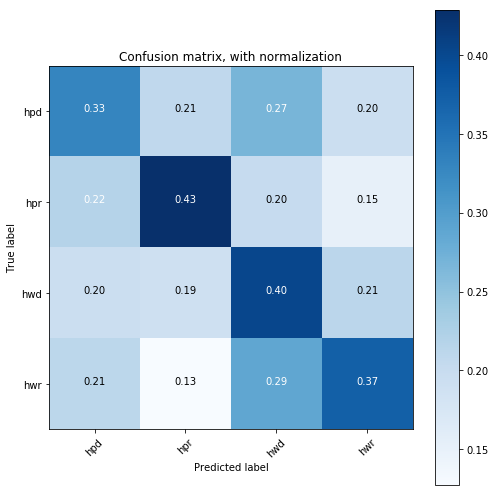

In [24]:
cnf_matrix2 = confusion_matrix(yts,pred_y2)
np.set_printoptions(precision=2)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix2,normalize=True, classes=n_labels,title='Confusion matrix, with normalization')
plt.show()

In [25]:
knn_class = KNeighborsClassifier()
pred_kn = knn_class.fit(xtr_pca, yohtr).predict(xts_pca)
pred_y3 = label_binarizer.inverse_transform(pred_tr)
accuracy_score(yohts, pred_kn)

0.39652173913043476

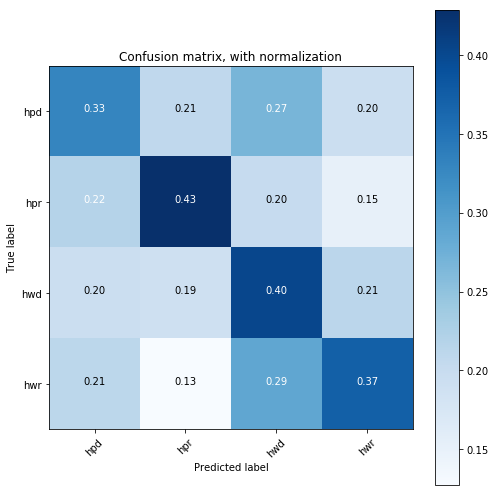

In [26]:
cnf_matrix3 = confusion_matrix(yts, pred_y3)
np.set_printoptions(precision=2)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix3,normalize=True, classes=n_labels,title='Confusion matrix, with normalization')
plt.show()

In [45]:
sv_class = OneVsRestClassifier(LinearSVC(random_state=0))
pred_sv = sv_class.fit(xtr_pca, yohtr).predict(xts_pca)
pred_y4 = label_binarizer.inverse_transform(pred_sv)
accuracy_score(yohts, pred_sv)

0.4191304347826087

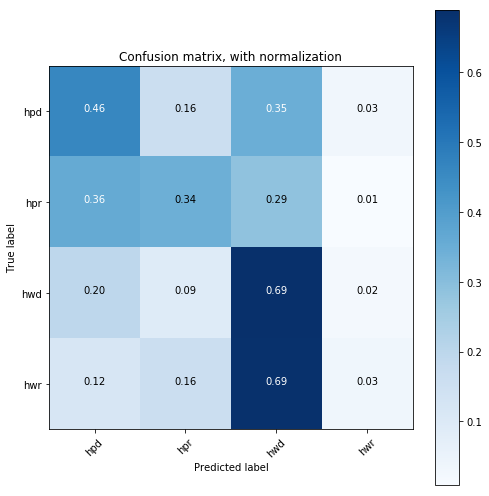

In [46]:
cnf_matrix4 = confusion_matrix(yts, pred_y4)
np.set_printoptions(precision=2)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix4,normalize=True, classes=n_labels,title='Confusion matrix, with normalization')
plt.show()